In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values


# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    #filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    
    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [2]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 6) (7352, 1) (7352, 6) (2947, 128, 6) (2947, 1) (2947, 6)


In [3]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [4]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [5]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)   

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [6]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [7]:
import random

static_2 = np.where(trainy  == 0)[0]
static_3 = np.where(trainy == 1)[0]
static_4 = np.where(trainy  == 2)[0]

dynamic_3 = np.where(trainy == 3)[0]
dynamic_4 = np.where(trainy == 4)[0]
dynamic_5 = np.where(trainy == 5)[0]

static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

# Shuffle dynamic data index
r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

trainX_static = X_train_all[static]
trainy_static = y_train_all[static]

trainX_dynamic = X_train_all[dynamic]
trainy_dynamic = y_train_all[dynamic]

trainX_combined = X_train_all
trainy_combined = y_train_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_4130/1208802571.py:19: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_4130/1208802571.py:20: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [8]:
static_2 = np.where(testy == 0)[0]
static_3 = np.where(testy == 1)[0]
static_4 = np.where(testy == 2)[0]
static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic_3 = np.where(testy == 3)[0]
dynamic_4 = np.where(testy == 4)[0]
dynamic_5 = np.where(testy == 5)[0]
dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

testX_static = X_test_all[static]
testy_static = y_test_all[static]

testX_dynamic = X_test_all[dynamic]
testy_dynamic = y_test_all[dynamic]

testX_combined = X_test_all
testy_combined = y_test_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_4130/3041243064.py:14: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_4130/3041243064.py:15: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [9]:
print("Train 0_s: Walking:" ,np.where(testy_static == 0)[0].size)
print("Train1_s: WU:" ,np.where(testy_static == 1)[0].size)
print("Train2_s: WD:" ,np.where(testy_static == 2)[0].size)
print("Train3_s: Sitting:" ,np.where(testy_static == 3)[0].size)
print("Train4_s: Standing:" ,np.where(testy_static == 4)[0].size)
print("Train5_s: Laying:" ,np.where(testy_static == 5)[0].size) 

print("Test 0_s: Walking:" ,np.where(trainy_static == 0)[0].size)
print("Test 1_s: WU:" ,np.where(trainy_static == 1)[0].size)
print("Test 2_s: WD:" ,np.where(trainy_static == 2)[0].size)
print("Test 3_s: Sitting:" ,np.where(trainy_static == 3)[0].size)
print("Test 4_s: Standing:" ,np.where(trainy_static == 4)[0].size)
print("Test 5_s: Laying:" ,np.where(trainy_static == 5)[0].size) 

Train 0_s: Walking: 496
Train1_s: WU: 471
Train2_s: WD: 420
Train3_s: Sitting: 0
Train4_s: Standing: 0
Train5_s: Laying: 0
Test 0_s: Walking: 1226
Test 1_s: WU: 1073
Test 2_s: WD: 986
Test 3_s: Sitting: 0
Test 4_s: Standing: 0
Test 5_s: Laying: 0


In [10]:
print("Train 0_d: Walking:" ,np.where(testy_dynamic == 0)[0].size)
print("Train1_d: WU:" ,np.where(testy_dynamic == 1)[0].size)
print("Train2_d: WD:" ,np.where(testy_dynamic == 2)[0].size)
print("Train3_d: Sitting:" ,np.where(testy_dynamic == 3)[0].size)
print("Train4_d: Standing:" ,np.where(testy_dynamic == 4)[0].size)
print("Train5_d: Laying:" ,np.where(testy_dynamic == 5)[0].size) 

print("Test 0_d: Walking:" ,np.where(trainy_dynamic == 0)[0].size)
print("Test 1_d: WU:" ,np.where(trainy_dynamic == 1)[0].size)
print("Test 2_d: WD:" ,np.where(trainy_dynamic == 2)[0].size)
print("Test 3_d: Sitting:" ,np.where(trainy_dynamic == 3)[0].size)
print("Test 4_d: Standing:" ,np.where(trainy_dynamic == 4)[0].size)
print("Test 5_d: Laying:" ,np.where(trainy_dynamic == 5)[0].size) 

Train 0_d: Walking: 0
Train1_d: WU: 0
Train2_d: WD: 0
Train3_d: Sitting: 491
Train4_d: Standing: 532
Train5_d: Laying: 537
Test 0_d: Walking: 0
Test 1_d: WU: 0
Test 2_d: WD: 0
Test 3_d: Sitting: 1286
Test 4_d: Standing: 1374
Test 5_d: Laying: 1407


In [11]:
trainy_static_one_hot = to_categorical(trainy_static)
testy_static_one_hot = to_categorical(testy_static)

trainy_dynamic_one_hot = to_categorical(trainy_dynamic)
testy_dynamic_one_hot = to_categorical(testy_dynamic)

trainy_combined_one_hot = to_categorical(trainy)
testy_combined_one_hot = to_categorical(testy)

In [12]:
print("X train shape: ", trainX_static.shape)
print("Y train shape: ", trainy_static.shape)
print("Y train One hot shape: ", trainy_static_one_hot.shape)
print("X test shape: ", testX_static.shape)
print("Y test shape: ", testy_static.shape)
print("Y test One hot shape: ", testy_static_one_hot.shape)

X train shape:  (3285, 128, 6)
Y train shape:  (3285, 1)
Y train One hot shape:  (3285, 3)
X test shape:  (1387, 128, 6)
Y test shape:  (1387, 1)
Y test One hot shape:  (1387, 3)


In [13]:
print("X train shape: ", trainX_dynamic.shape)
print("Y train shape: ", trainy_dynamic.shape)
print("Y train One hot shape: ", trainy_dynamic_one_hot.shape)
print("X test shape: ", testX_dynamic.shape)
print("Y test shape: ", testy_dynamic.shape)
print("Y test One hot shape: ", testy_dynamic_one_hot.shape)

X train shape:  (4067, 128, 6)
Y train shape:  (4067, 1)
Y train One hot shape:  (4067, 6)
X test shape:  (1560, 128, 6)
Y test shape:  (1560, 1)
Y test One hot shape:  (1560, 6)


In [14]:
print("X train shape: ", trainX_combined.shape)
print("Y train shape: ", trainy_combined.shape)
print("Y train One hot shape: ", trainy_combined_one_hot.shape)
print("X test shape: ", testX_combined.shape)
print("Y test shape: ", testy_combined.shape)
print("Y test One hot shape: ", testy_combined_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [15]:
unique, counts = np.unique(trainy_static, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_static, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]]


In [16]:
unique, counts = np.unique(trainy_dynamic, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_dynamic, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  3 491]
 [  4 532]
 [  5 537]]


In [17]:
unique, counts = np.unique(trainy_combined, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_combined, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [18]:
from sklearn.model_selection import train_test_split

X_train_static,X_val_static,y_train_static_one_hot,y_val_static_one_hot,y_train_static,y_val_static=train_test_split(trainX_static, trainy_static_one_hot, trainy_static,test_size=0.2,random_state=100)

In [19]:
from sklearn.model_selection import train_test_split

X_train_dynamic,X_val_dynamic,y_train_dynamic_one_hot,y_val_dynamic_one_hot,y_train_dynamic,y_val_dynamic=train_test_split(trainX_dynamic, trainy_dynamic_one_hot, trainy_dynamic,test_size=0.2,random_state=100)

In [20]:
from sklearn.model_selection import train_test_split

X_train_combined,X_val_combined,y_train_combined_one_hot,y_val_combined_one_hot,y_train_combined,y_val_combined=train_test_split(trainX_combined, trainy_combined_one_hot, trainy_combined,test_size=0.2,random_state=100)

In [21]:
X_train_combined.shape, y_train_combined.shape, testX_combined.shape, testy_combined.shape

((5881, 128, 6), (5881, 1), (2947, 128, 6), (2947, 1))

In [22]:
n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic = X_train_dynamic.shape[1], X_train_dynamic.shape[2], testy_dynamic_one_hot.shape[1]


In [23]:
n_timesteps_static, n_features_static, n_outputs_static = X_train_static.shape[1], X_train_static.shape[2], testy_static_one_hot.shape[1]

In [24]:
n_timesteps_combined, n_features_combined, n_outputs_combined = X_train_combined.shape[1], X_train_combined.shape[2], testy_combined_one_hot.shape[1]


In [25]:
n_timesteps_static, n_features_static, n_outputs_static, n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic, n_timesteps_combined, n_features_combined, n_features_combined

(128, 6, 3, 128, 6, 6, 128, 6, 6)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical

# Model

In [27]:
def CNN(n_timesteps, n_features, n_outputs, inputs):
    ##Level_1
    # layer 1
    inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
    conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
    # layer 2
    inputs1_2= Input(shape=(n_timesteps,n_features))
    conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
    # layer 3
    inputs1_3= Input(shape=(n_timesteps,n_features))
    conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
    # layer 4
    inputs1_4= Input(shape=(n_timesteps,n_features))
    conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

    # merge1
    merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

    #maxpool1
    pool_1=MaxPooling1D(pool_size=5)(merged_1)

    ##Level_2
    # layer 1
    conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
    # layer 2
    conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
    # layer 3
    conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
    # layer 4

    conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1) 
    # merge2
    merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

    #maxpool2
    pool_2=MaxPooling1D(pool_size=5)(merged_2)


    ##Level_3
    # layer 1
    conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
    # layer 2
    conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
    # layer 3
    conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
    # layer 4

    conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2) 
    # merge2
    merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

    #maxpool2
    pool_3=MaxPooling1D(pool_size=5)(merged_3)


    #flatten
    flat_cnn=Flatten()(pool_3)

    ##dense layer
    dense = Dense(512, activation='relu')(flat_cnn)
    outputs = Dense(n_outputs, activation='softmax')(dense)

    ##MODEL
    cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

    return cnn3_model

In [28]:
def C1D1(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Flatten(),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [29]:
def C1D2(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
def C1D3(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(64, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
def C2D1(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(5),
        Flatten(),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
def C2D2(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(5),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
def C2D3(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(5),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(5),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(64, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
def C3D1(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
def C3D2(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
def C3D3(n_timesteps, n_features, n_outputs):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(64, activation='relu'),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Static

In [37]:
def make_static_history(model):
    return model.fit(x=X_train_static, y=y_train_static_one_hot, epochs=50, batch_size=32, validation_data=(X_val_static, y_val_static_one_hot))

In [38]:
X_train_static.shape, y_train_static_one_hot.shape, X_val_static.shape, y_val_static_one_hot.shape

((2628, 128, 6), (2628, 3), (657, 128, 6), (657, 3))

In [39]:
# fit network
c1d1_model_static = C1D1(n_timesteps_static, n_features_static, n_outputs_static)
c1d2_model_static = C1D2(n_timesteps_static, n_features_static, n_outputs_static)
c1d3_model_static = C1D3(n_timesteps_static, n_features_static, n_outputs_static)
c2d1_model_static = C2D1(n_timesteps_static, n_features_static, n_outputs_static)
c2d2_model_static = C2D2(n_timesteps_static, n_features_static, n_outputs_static)
c2d3_model_static = C2D3(n_timesteps_static, n_features_static, n_outputs_static)
c3d1_model_static = C3D1(n_timesteps_static, n_features_static, n_outputs_static)
c3d2_model_static = C3D2(n_timesteps_static, n_features_static, n_outputs_static)
c3d3_model_static = C3D3(n_timesteps_static, n_features_static, n_outputs_static)

c1d1_history_static = make_static_history(c1d1_model_static)
c1d2_history_static = make_static_history(c1d2_model_static)
c1d3_history_static = make_static_history(c1d3_model_static)
c2d1_history_static = make_static_history(c2d1_model_static)
c2d2_history_static = make_static_history(c2d2_model_static)
c2d3_history_static = make_static_history(c2d3_model_static)
c3d1_history_static = make_static_history(c3d1_model_static)
c3d2_history_static = make_static_history(c3d2_model_static)
c3d3_history_static = make_static_history(c3d3_model_static)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1216      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 3)                 4803      
                                                                 
Total params: 6,019
Trainable params: 6,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
83/83 [==============================] - 1s 6ms/step - loss: 0.9310 - accuracy: 0.5780 - val_loss: 0.7490 - v

In [40]:
c1d2_history_static = make_static_history(c1d2_model_static)

Epoch 1/50
83/83 [==============================] - 0s 3ms/step - loss: 1.8113e-04 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 2/50
83/83 [==============================] - 0s 4ms/step - loss: 1.6122e-04 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9924
Epoch 3/50
83/83 [==============================] - 0s 3ms/step - loss: 1.4906e-04 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9924
Epoch 4/50
83/83 [==============================] - 0s 3ms/step - loss: 1.4655e-04 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9924
Epoch 5/50
83/83 [==============================] - 0s 3ms/step - loss: 1.3421e-04 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9924
Epoch 6/50
83/83 [==============================] - 0s 3ms/step - loss: 1.2938e-04 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9924
Epoch 7/50
83/83 [==============================] - 0s 3ms/step - loss: 1.1407e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy:

# Dynamic

In [41]:
def make_dynamic_history(model):
    return model.fit(x=X_train_dynamic, y=y_train_dynamic_one_hot, epochs=50, batch_size=32, validation_data=(X_val_dynamic, y_val_dynamic_one_hot))

In [42]:
# fit network
c1d1_model_dynamic = C1D1(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c1d2_model_dynamic = C1D2(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c1d3_model_dynamic = C1D3(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c2d1_model_dynamic = C2D1(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c2d2_model_dynamic = C2D2(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c2d3_model_dynamic = C2D3(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c3d1_model_dynamic = C3D1(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c3d2_model_dynamic = C3D2(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)
c3d3_model_dynamic = C3D3(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)

c1d1_history_dynamic = make_dynamic_history(c1d1_model_dynamic)
c1d2_history_dynamic = make_dynamic_history(c1d2_model_dynamic)
c1d3_history_dynamic = make_dynamic_history(c1d3_model_dynamic)
c2d1_history_dynamic = make_dynamic_history(c2d1_model_dynamic)
c2d2_history_dynamic = make_dynamic_history(c2d2_model_dynamic)
c2d3_history_dynamic = make_dynamic_history(c2d3_model_dynamic)
c3d1_history_dynamic = make_dynamic_history(c3d1_model_dynamic)
c3d2_history_dynamic = make_dynamic_history(c3d2_model_dynamic)
c3d3_history_dynamic = make_dynamic_history(c3d3_model_dynamic)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 126, 64)           1216      
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 25, 64)           0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 6)                 9606      
                                                                 
Total params: 10,822
Trainable params: 10,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
102/102 [==============================] - 1s 3ms/step - loss: 0.4106 - accuracy: 0.8534 - val_loss: 0.22

In [43]:
def make_combined_history(model):
    return model.fit(x=X_train_combined, y=y_train_combined_one_hot, epochs=50, batch_size=32, validation_data=(X_val_combined, y_val_combined_one_hot))

In [44]:
# fit network
c1d1_model_combined = C1D1(n_timesteps_combined, n_features_combined, n_outputs_combined)
c1d2_model_combined = C1D2(n_timesteps_combined, n_features_combined, n_outputs_combined)
c1d3_model_combined = C1D3(n_timesteps_combined, n_features_combined, n_outputs_combined)
c2d1_model_combined = C2D1(n_timesteps_combined, n_features_combined, n_outputs_combined)
c2d2_model_combined = C2D2(n_timesteps_combined, n_features_combined, n_outputs_combined)
c2d3_model_combined = C2D3(n_timesteps_combined, n_features_combined, n_outputs_combined)
c3d1_model_combined = C3D1(n_timesteps_combined, n_features_combined, n_outputs_combined)
c3d2_model_combined = C3D2(n_timesteps_combined, n_features_combined, n_outputs_combined)
c3d3_model_combined = C3D3(n_timesteps_combined, n_features_combined, n_outputs_combined)

c1d1_history_combined = make_combined_history(c1d1_model_combined)
c1d2_history_combined = make_combined_history(c1d2_model_combined)
c1d3_history_combined = make_combined_history(c1d3_model_combined)
c2d1_history_combined = make_combined_history(c2d1_model_combined)
c2d2_history_combined = make_combined_history(c2d2_model_combined)
c2d3_history_combined = make_combined_history(c2d3_model_combined)
c3d1_history_combined = make_combined_history(c3d1_model_combined)
c3d2_history_combined = make_combined_history(c3d2_model_combined)
c3d3_history_combined = make_combined_history(c3d3_model_combined)



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 126, 64)           1216      
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 25, 64)           0         
 g1D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_36 (Dense)            (None, 6)                 9606      
                                                                 
Total params: 10,822
Trainable params: 10,822
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 0.7775 - accuracy: 0.7230 - val_loss: 0.4

# Result

In [45]:
def view_loss(model_static_history, model_dynamic_history, model_combined_history, name):
    loss_static = model_static_history.history['loss']
    loss_dynamic = model_dynamic_history.history['loss']
    loss_combined = model_combined_history.history['loss']
    epochs = range(1, len(loss_static) + 1)
    plt.plot(epochs, loss_static, 'y', label='STATIC Training loss')
    plt.plot(epochs, loss_dynamic, 'b', label='DYNAMIC Training loss')
    plt.plot(epochs, loss_combined, color='violet', label='COMBINED Training loss')
    plt.title(f'{name} Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [46]:
def view_val_acc(model_static_history, model_dynamic_history, model_combined_history, name):
    val_acc_static = model_static_history.history['accuracy']
    val_acc_dynamic = model_dynamic_history.history['accuracy']
    val_acc_combined = model_combined_history.history['accuracy']
    epochs = range(1, len(val_acc_static) + 1)
    plt.plot(epochs, val_acc_static, 'y', label='STATIC Training loss')
    plt.plot(epochs, val_acc_dynamic, 'b', label='DYNAMIC Training loss')
    plt.plot(epochs, val_acc_combined, color='violet', label='COMBINED Training loss')
    plt.title(f'{name} Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

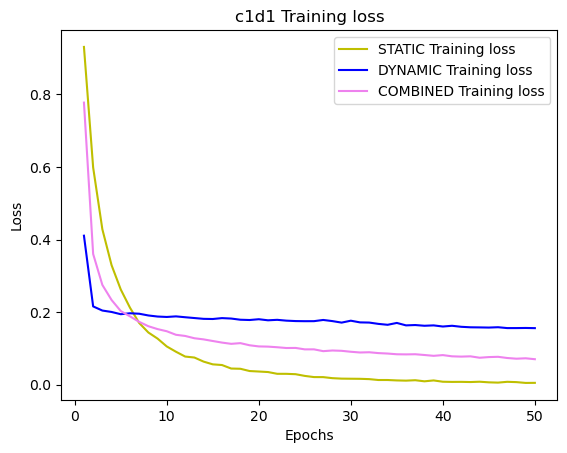

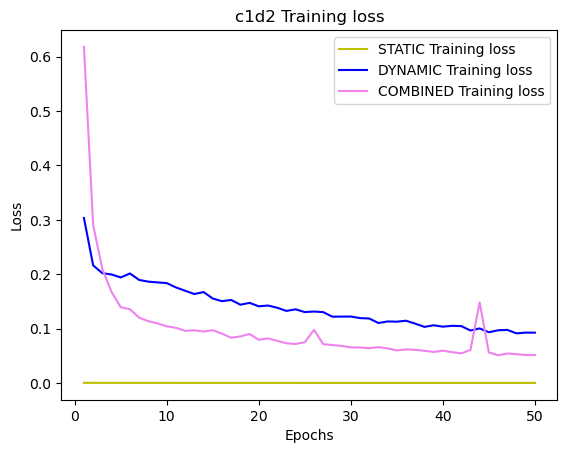

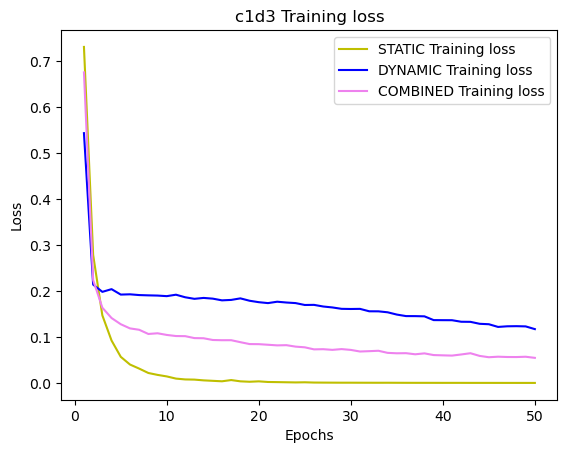

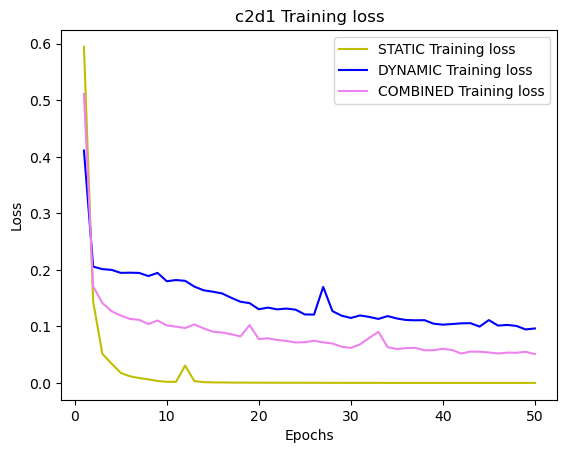

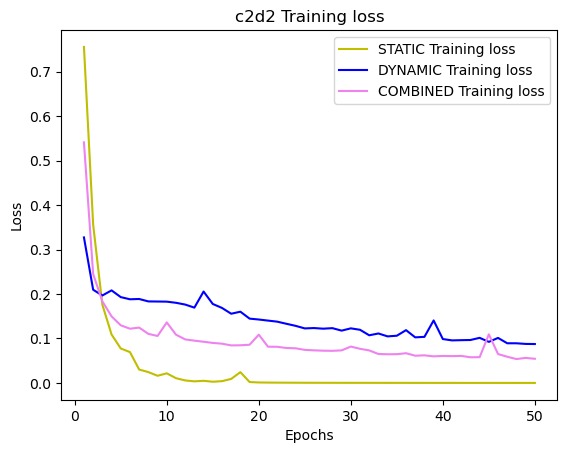

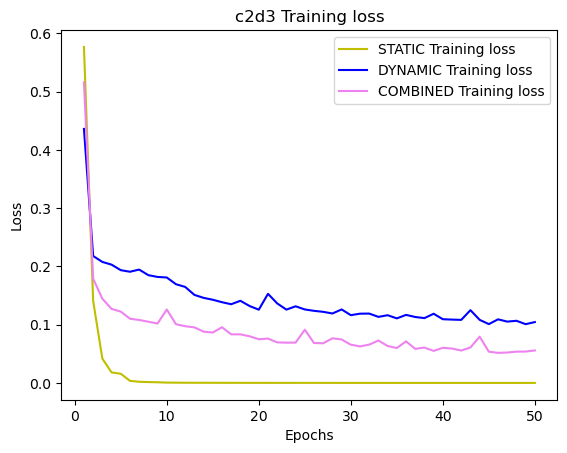

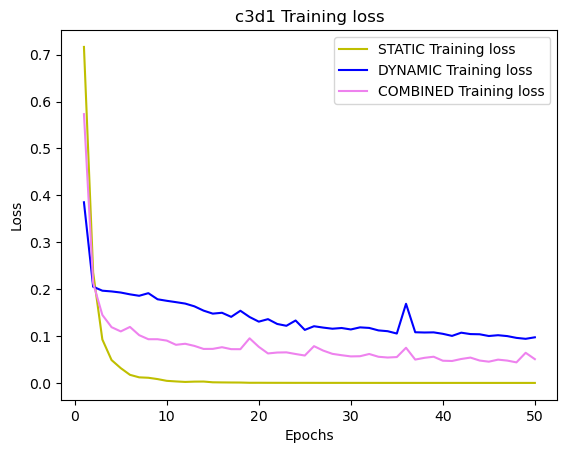

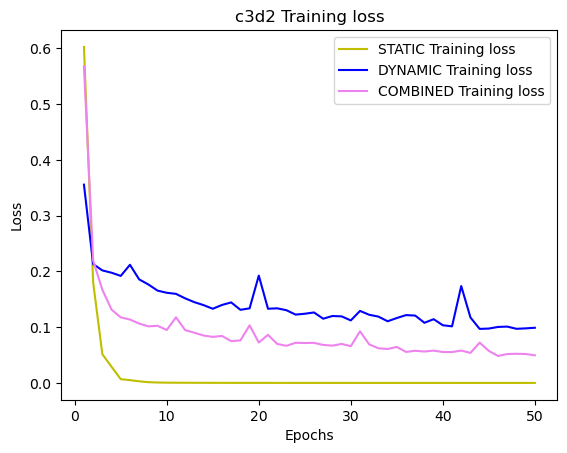

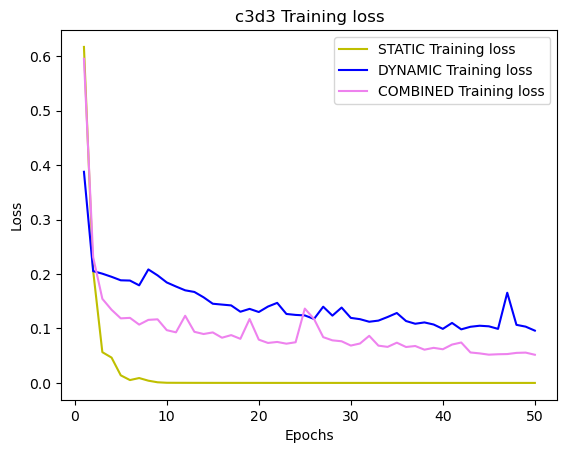

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

view_loss(c1d1_history_static, c1d1_history_dynamic, c1d1_history_combined, "c1d1")
view_loss(c1d2_history_static, c1d2_history_dynamic, c1d2_history_combined, "c1d2")
view_loss(c2d1_history_static, c2d1_history_dynamic, c2d1_history_combined, "c1d3")
view_loss(c2d2_history_static, c2d2_history_dynamic, c2d2_history_combined, "c2d1")
view_loss(c1d3_history_static, c1d3_history_dynamic, c1d3_history_combined, "c2d2")
view_loss(c2d3_history_static, c2d3_history_dynamic, c2d3_history_combined, "c2d3")
view_loss(c3d1_history_static, c3d1_history_dynamic, c3d1_history_combined, "c3d1")
view_loss(c3d2_history_static, c3d2_history_dynamic, c3d2_history_combined, "c3d2")
view_loss(c3d3_history_static, c3d3_history_dynamic, c3d3_history_combined, "c3d3")

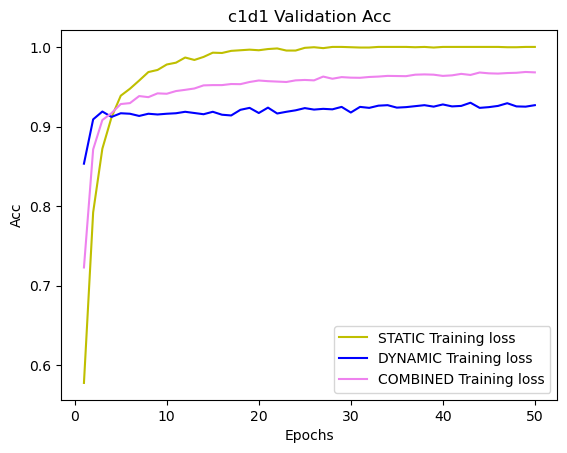

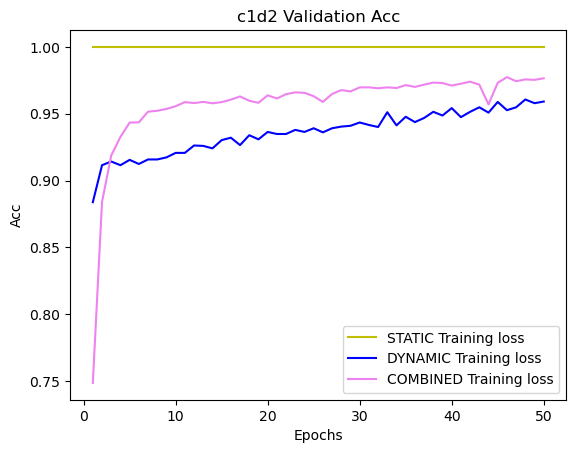

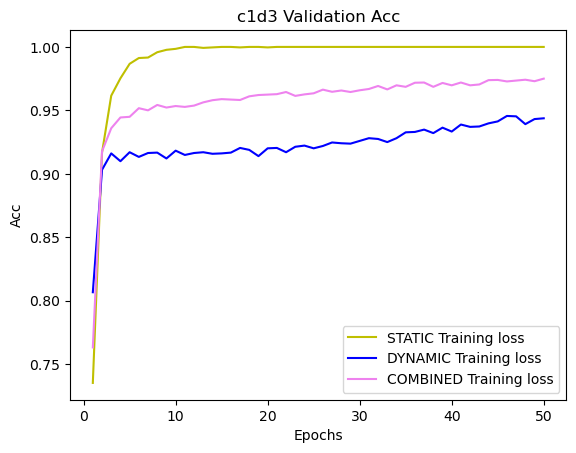

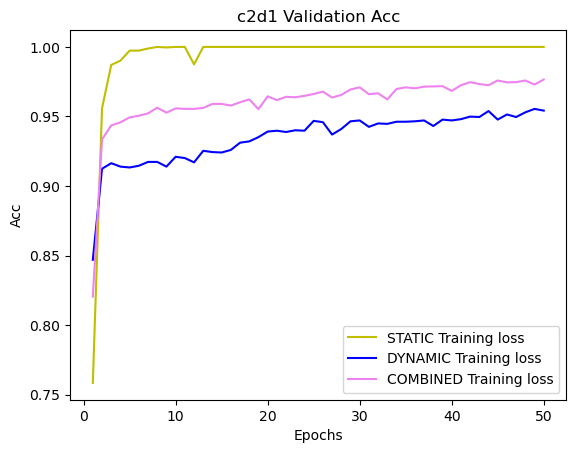

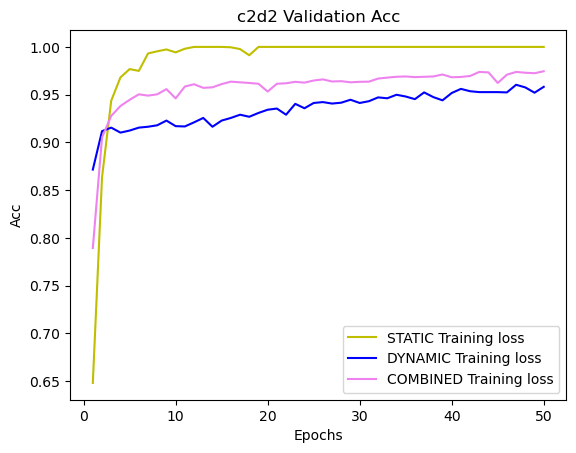

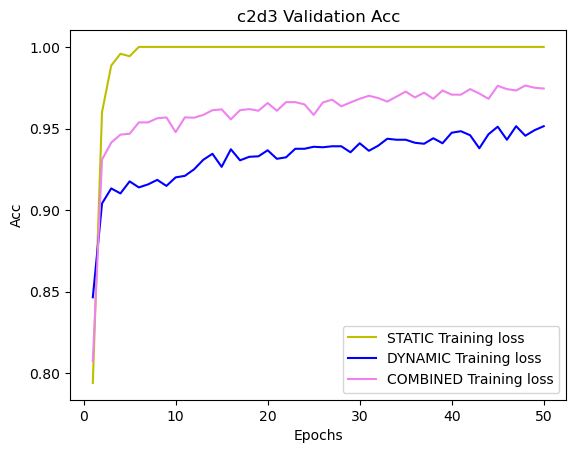

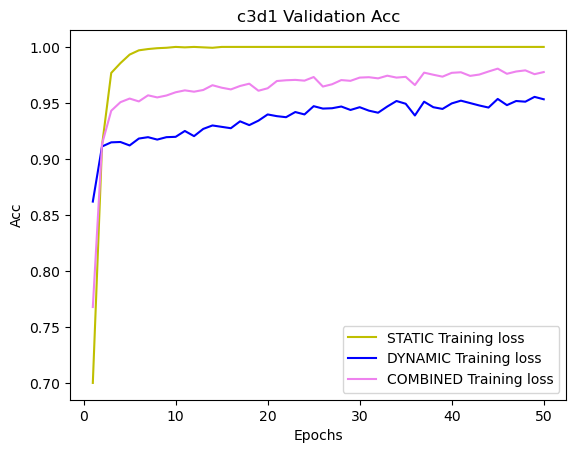

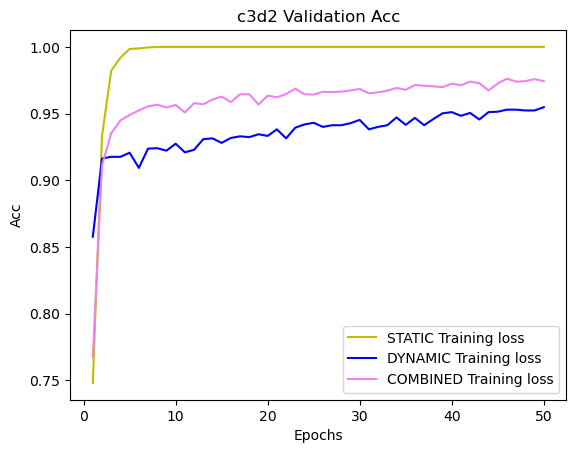

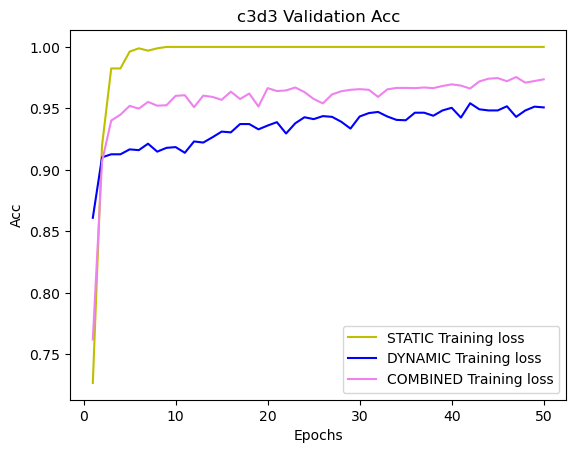

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

view_val_acc(c1d1_history_static, c1d1_history_dynamic, c1d1_history_combined, "c1d1")
view_val_acc(c1d2_history_static, c1d2_history_dynamic, c1d2_history_combined, "c1d2")
view_val_acc(c2d1_history_static, c2d1_history_dynamic, c2d1_history_combined, "c1d3")
view_val_acc(c2d2_history_static, c2d2_history_dynamic, c2d2_history_combined, "c2d1")
view_val_acc(c1d3_history_static, c1d3_history_dynamic, c1d3_history_combined, "c2d2")
view_val_acc(c2d3_history_static, c2d3_history_dynamic, c2d3_history_combined, "c2d3")
view_val_acc(c3d1_history_static, c3d1_history_dynamic, c3d1_history_combined, "c3d1")
view_val_acc(c3d2_history_static, c3d2_history_dynamic, c3d2_history_combined, "c3d2")
view_val_acc(c3d3_history_static, c3d3_history_dynamic, c3d3_history_combined, "c3d3")

In [49]:
def heatmap_static(model):
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
    pred_static = model.predict(testX_static)
    pred_static = np.argmax(pred_static, axis=-1)
    cm_static=confusion_matrix(testy_static,pred_static)
    print(cm_static)
    print(accuracy_score(testy_static,pred_static))
    print(classification_report(testy_static,pred_static))
    sns.heatmap(cm_static, annot=True, fmt = '.2f')

44/44 [==============================] - 0s 1ms/step
[[467  10  19]
 [ 42 413  16]
 [  9   7 404]]
0.9257390050468637
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       496
           1       0.96      0.88      0.92       471
           2       0.92      0.96      0.94       420

    accuracy                           0.93      1387
   macro avg       0.93      0.93      0.93      1387
weighted avg       0.93      0.93      0.93      1387



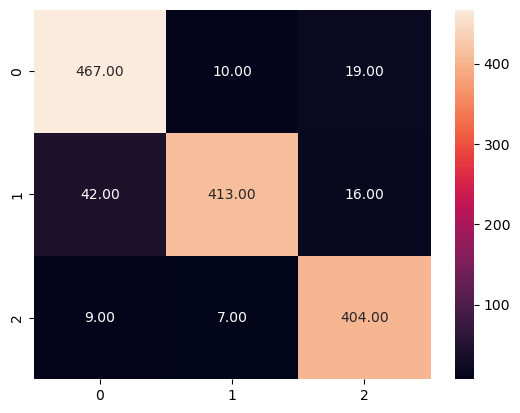

In [50]:
heatmap_static(c1d1_model_static)

44/44 [==============================] - 0s 2ms/step
[[490   1   5]
 [ 30 417  24]
 [  2   1 417]]
0.9545782263878875
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       496
           1       1.00      0.89      0.94       471
           2       0.93      0.99      0.96       420

    accuracy                           0.95      1387
   macro avg       0.96      0.96      0.95      1387
weighted avg       0.96      0.95      0.95      1387



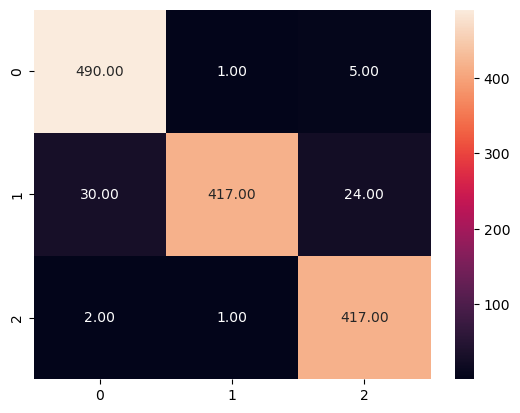

In [51]:
heatmap_static(c2d1_model_static)

In [52]:
def eval(model_static, model_dynamic, model_combined, x_static, y_static, x_dynamic, y_dynamic, x_combined, y_combined):
    score_static = model_static.evaluate(x_static, y_static)
    score_dynamic = model_dynamic.evaluate(x_dynamic, y_dynamic)
    score_combined = model_combined.evaluate(x_combined, y_combined)

    return score_static[1], score_dynamic[1], score_combined[1]

In [56]:
eval(c1d1_model_static, c1d1_model_dynamic, c1d1_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c1d2_model_static, c1d2_model_dynamic, c1d2_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c1d3_model_static, c1d3_model_dynamic, c1d3_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c2d1_model_static, c2d1_model_dynamic, c2d1_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c2d2_model_static, c2d2_model_dynamic, c2d2_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c2d3_model_static, c2d3_model_dynamic, c2d3_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c3d1_model_static, c3d1_model_dynamic, c3d1_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c3d2_model_static, c3d2_model_dynamic, c3d2_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)
eval(c3d3_model_static, c3d3_model_dynamic, c3d3_model_combined, testX_static, testy_static_one_hot, testX_dynamic, testy_dynamic_one_hot, testX_combined, testy_combined_one_hot)

93/93 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.8894


(0.937274694442749, 0.8634615540504456, 0.8893790245056152)

# Accuracy
### Static + Dynamic : 0.8941
### Static : 0.9611
### Dynamic : 0.8449

In [54]:
static_ratio = testX_static.shape[0] / testX.shape[0]
dynamic_ratio = testX_dynamic.shape[0] / testX.shape[0]

testX_static.shape[0], testX_dynamic.shape[0]

(1387, 1560)

### Accuracy

In [55]:
mod_acc = static_ratio * score_static[1] + dynamic_ratio * score_dynamic[1]
mod_acc

NameError: name 'score_static' is not defined